In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools

import plotly
import plotly.graph_objs as go
from plotly.offline import *

In [3]:
df = pd.read_csv('time.csv', index_col=0)
df.reset_index(inplace=False)
df.index.name='Time'

In [4]:
df.columns= ['Rain']
df.index = pd.to_datetime(df.index)

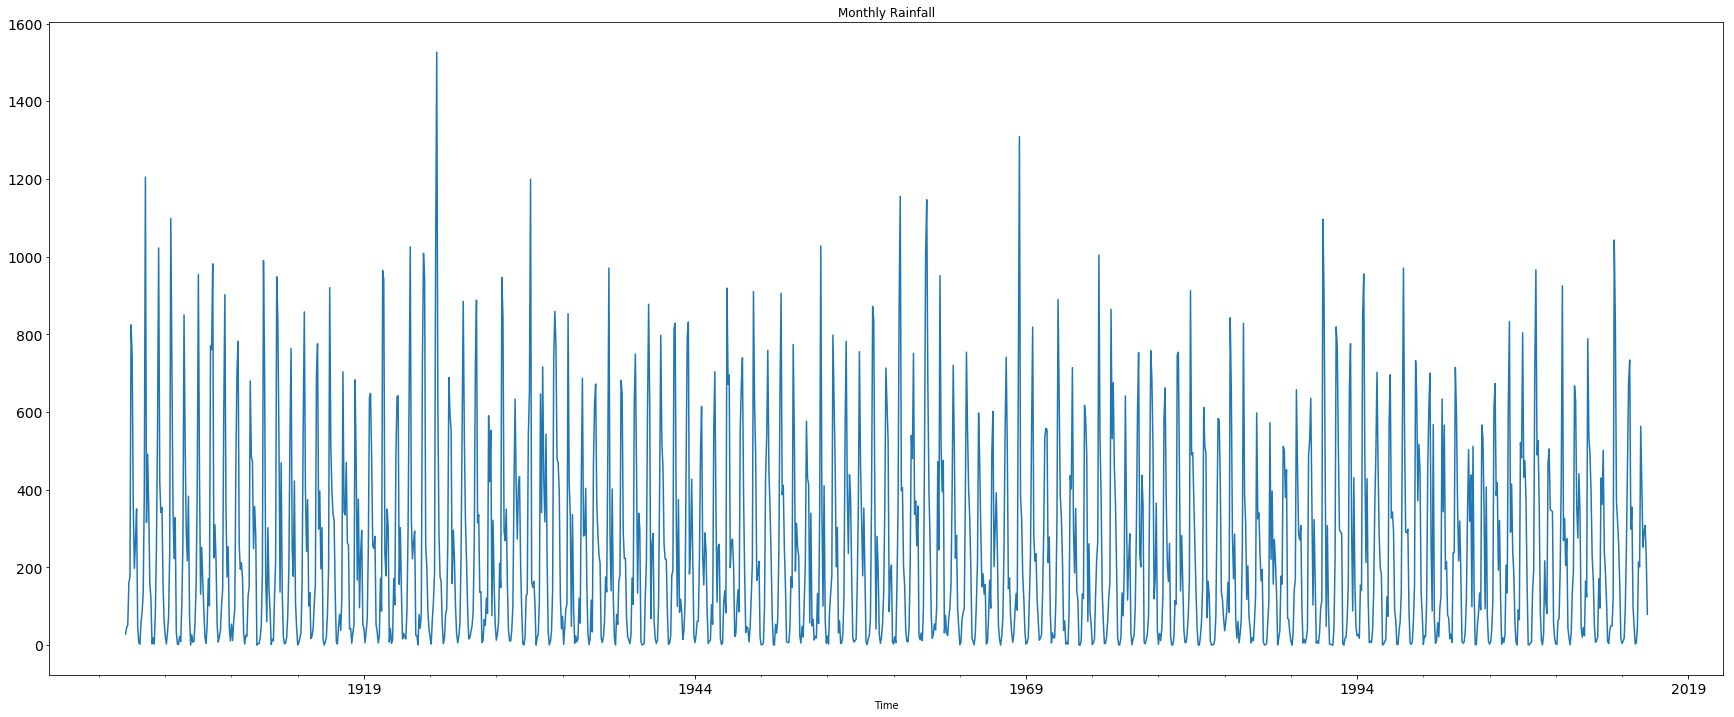

In [5]:
df.Rain.plot(figsize=(30,12), title= 'Monthly Rainfall', fontsize=14)
plt.savefig('month_rainfall.png')

<Figure size 432x288 with 0 Axes>

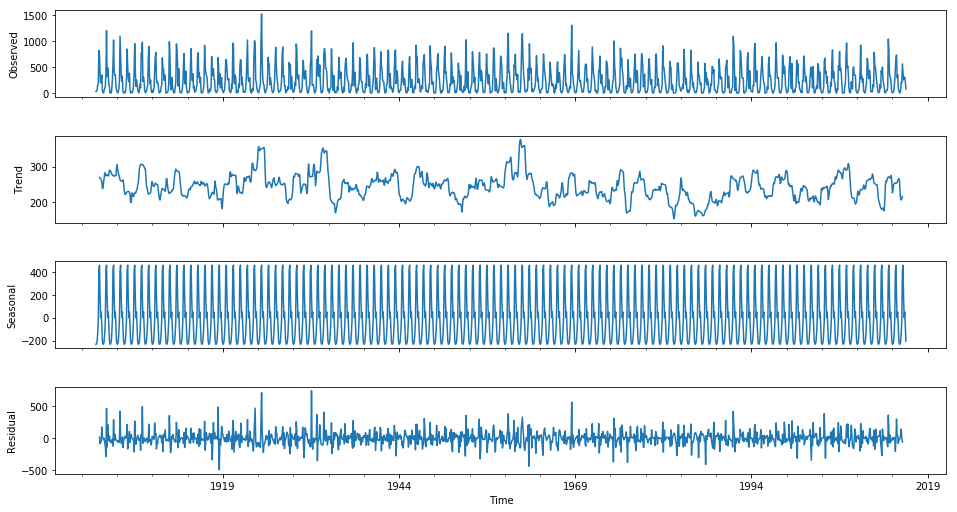

In [6]:
decomposition = seasonal_decompose(df.Rain, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [8]:
"""Uncomment this block for the EDA and Grid Search"""
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = timeseries.rolling(12).mean()
#     rolstd = timeseries.rolling(12).std()

#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(12, 8))
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
#     #Perform Dickey-Fuller test:
#     print 'Results of Dickey-Fuller Test:'
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print dfoutput

# test_stationarity(df.Rain)
# df.Rain_log= df.Rain.apply(lambda x: np.log(x))  
# test_stationarity(df.Rain_log)
# df['seasonal_difference'] = df.Rain - df.Rain.shift(12)  
# test_stationarity(df.seasonal_difference.dropna(inplace=False))
# df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(12)  
# test_stationarity(df.seasonal_first_difference.dropna(inplace=False))
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

# p = [0,1,2,4,6,8,10]
# d = range(3)
# q = range(3)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(df["Rain"],
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue


'Uncomment this block for the EDA and Grid Search'

In [9]:
mod = sm.tsa.statespace.SARIMAX(df.Rain, trend='n', order=(8,0,0), seasonal_order=(10,1,1,12))
results = mod.fit()
print results.summary()

/home/teejay/miniconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                  Statespace Model Results                                 
Dep. Variable:                                Rain   No. Observations:                 1380
Model:             SARIMAX(8, 0, 0)x(10, 1, 1, 12)   Log Likelihood               -8489.599
Date:                             Thu, 14 Mar 2019   AIC                          17019.198
Time:                                     12:47:48   BIC                          17123.620
Sample:                                 01-01-1901   HQIC                         17058.278
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0170      0.022      0.779      0.436      -0.026       0.060
ar.L2         -0.0098      

In [34]:
df['forecast'] = results.predict(start = pd.to_datetime('1930-01-01'),dynamic= False)

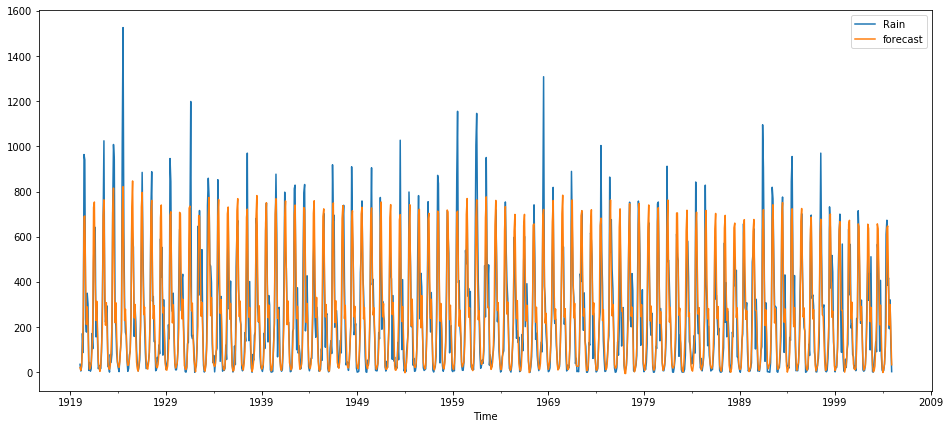

In [33]:
df5 = df[348:]
df5[['Rain', 'forecast']].plot(figsize=(16, 7)) 
plt.savefig('ts_df_predict_future.png', bbox_inches='tight')

In [38]:
err = np.abs(df["Rain"][348:] - df["forecast"][348:])

In [39]:
mean_err = np.mean(err)
rmse = np.sqrt(np.mean(np.square(err)))

In [41]:
df6 = df.reset_index(drop=False, inplace=False)

In [42]:
layout = go.Layout(title='Rainfall in Kerala',
    xaxis=dict(title='Years', titlefont=dict(family='Courier New, monospace',size=18,color='#7f7f7f')),
    yaxis=dict(title='Rainfall in mm',titlefont=dict(family='Courier New, monospace',size=18,color='#7f7f7f')))

x=df6['Time']
t1 = go.Scatter(x=x, y=df6['Rain'],mode='lines', line={},name='Ground Truth')
t2 = go.Scatter(x=x,y=df6['forecast'],mode='lines', line={},name='Forecast')

layout = go.Layout(title="Rainfall in Kerala")
data = go.Data([t1, t2])
fig = go.Figure(data=data, layout=layout)

plotly.offline.plot(fig, filename='index.html')

'file:///home/teejay/Downloads/index.html'

In [49]:
df[348:].to_csv("results.csv")